<a href="https://colab.research.google.com/github/Muzi-HS/2023ML/blob/main/%EC%A0%95%ED%98%84%EC%88%98(%EC%97%90%EC%8A%A4%ED%8C%8C%2C50%2C0.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


한글 폰트

In [2]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y
!pip install koreanize-matplotlib


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
#matplotlib.font_manager._rebuild()


현재 위치 확인

In [4]:
import koreanize_matplotlib
!pwd

/content


데이터 셋 구성 함수

In [5]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import os
import shutil

directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
    './custom_dataset/val/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt, val_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir('/content/drive/MyDrive/image/' + query):
        if cnt < train_cnt:
            shutil.copyfile('/content/drive/MyDrive/image/'+ query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)

            print(f'[Train Dataset] {file_name}')

            for i in range(1,6):
                image_path = '/content/drive/MyDrive/image/'+ query + '/' + file_name
                image = cv2.imread(image_path)
                save_dir = './custom_dataset/train/' + query
                image_name = 'image' + str(cnt * train_cnt + i) + '.jpg'
                cv2.imwrite(os.path.join(save_dir, image_name), image)

        elif cnt < train_cnt + val_cnt:
            print(f'[Validation Dataset] {file_name}')
            shutil.copyfile('/content/drive/MyDrive/image/'+ query + '/' + file_name, './custom_dataset/val/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.copyfile('/content/drive/MyDrive/image/'+ query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    #shutil.rmtree(query)


데이터 셋 삭제

In [7]:
# 이미지 데이터셋 디렉토리 경로
dataset_directory = './custom_dataset'

# 데이터셋 삭제 함수
def delete_dataset():
    # 데이터셋 디렉토리 삭제
    shutil.rmtree(dataset_directory)

# 데이터셋 삭제 함수 호출
delete_dataset()

데이터셋 적용하기

In [8]:
# /content/drive/MyDrive/image

## 에스파 버전

query = '닝닝'
dataset_split(query, 20, 5)

query = '윈터'
dataset_split(query, 20, 5)

query = '지젤'
dataset_split(query, 20, 5)

query = '카리나'
dataset_split(query, 20, 5)



## 방탄 버전

# query = '방탄 진'
# dataset_split(query, 20, 5)

# query = '뷔'
# dataset_split(query, 20, 5)

# query = '슈가'
# dataset_split(query, 20, 5)

# query = '정국'
# dataset_split(query, 20, 5)

# query = 'RM'
# dataset_split(query, 20, 5)

# query = '제이홉'
# dataset_split(query, 20, 5)

# query = '지민'
# dataset_split(query, 20, 5)



[Train Dataset] NingNing_1.jpg
[Train Dataset] NingNing_22.jpg
[Train Dataset] NingNing_17.jpg
[Train Dataset] NingNing_29.jpg
[Train Dataset] NingNing_3.jpg
[Train Dataset] NingNing_7.jpg
[Train Dataset] NingNing_20.jpg
[Train Dataset] NingNing_19.jpg
[Train Dataset] NingNing_10.jpg
[Train Dataset] NingNing_23.jpg
[Train Dataset] NingNing_24.jpg
[Train Dataset] NingNing_18.jpg
[Train Dataset] NingNing_4.jpg
[Train Dataset] NingNing_14.jpg
[Train Dataset] NingNing_2.jpg
[Train Dataset] NingNing_27.jpg
[Train Dataset] NingNing_13.jpg
[Train Dataset] NingNing_21.jpg
[Train Dataset] NingNing_9.jpg
[Train Dataset] NingNing_15.jpg
[Validation Dataset] NingNing_16.jpg
[Validation Dataset] NingNing_6.jpg
[Validation Dataset] NingNing_28.jpg
[Validation Dataset] NingNing_12.jpg
[Validation Dataset] NingNing_25.jpg
[Test Dataset] NingNing_11.jpg
[Test Dataset] NingNing_5.jpg
[Test Dataset] NingNing_8.jpg
[Test Dataset] NingNing_30.jpg
[Test Dataset] NingNing_26.jpg
[Train Dataset] Winter_18.jpg

전이 학습을 위한 라이브러리 불러오기

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import nn
import torchvision
from torchvision import datasets, models, transforms
import tensorflow as tf
import numpy as np
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

데이터 셋 불러오기

In [10]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=30), # 무작위 회전 (최대 30도)
    transforms.RandomResizedCrop((224, 224), scale=(0.8, 1.2), ratio=(0.8, 1.2)), # 무작위 크롭 및 확대축소 (크기: 224x224, 크기 비율: 0.8 ~ 1.2)
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)), # 무작위 이동 및 확대축소
    transforms.RandomHorizontalFlip(), # 무작위 수평 뒤집기
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

In [12]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
val_datasets = datasets.ImageFolder(os.path.join(data_dir, 'val'), transforms)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('val 데이터셋 크기:', len(val_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 480
val 데이터셋 크기: 20
테스트 데이터셋 크기: 20
클래스: ['닝닝', '윈터', '지젤', '카리나']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


데이터 셋이 제대로 불러와졌는지 이미지 시각화

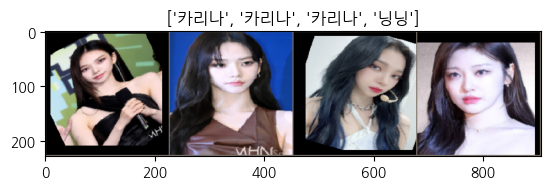

In [13]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

데이터 클래스 확인

In [14]:
print(train_datasets.classes)

['닝닝', '윈터', '지젤', '카리나']


training

In [15]:
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def evaluate(model, criterion, dataloader, device):
    model.eval()
    running_loss = 0.
    running_corrects = 0
    y_true, y_pred = [], []
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        y_true += labels.cpu().numpy().tolist()
        y_pred += preds.cpu().numpy().tolist()

    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects / len(dataloader.dataset) * 100.
    conf_mat = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=class_names)
    acc = accuracy_score(y_true, y_pred)

    print('Confusion Matrix:')
    print(conf_mat)
    print('Classification Report:')
    print(class_report)

    return epoch_loss, epoch_acc


In [17]:
from torch.optim.lr_scheduler import StepLR

# 학습률 스케줄러 정의
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

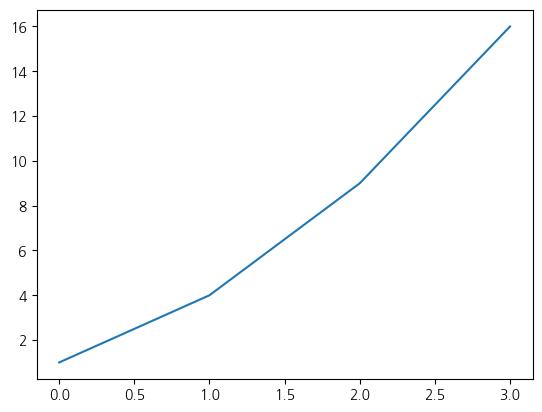

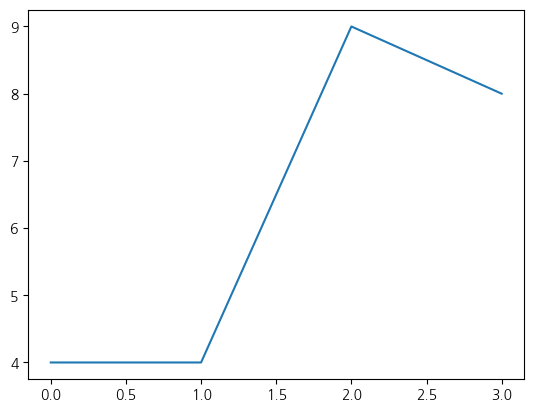

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(4), [1, 4, 9, 16])
plt.show()
plt.plot(range(4), [4, 4, 9, 8])
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 4 0]
 [1 0 4 0]
 [1 0 4 0]
 [1 1 3 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.25      0.20      0.22         5
          윈터       0.00      0.00      0.00         5
          지젤       0.27      0.80      0.40         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.13      0.25      0.16        20
weighted avg       0.13      0.25      0.16        20

Validation Loss: 1.5978 Acc: 25.0000%
Training complete in 0m 16s
Best Validation Accuracy: 25.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

Confusion Matrix:
[[0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.25      1.00      0.40         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.3903 Acc: 25.0000%
Training complete in 0m 30s
Best Validation Accuracy: 25.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloa

Confusion Matrix:
[[0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.25      1.00      0.40         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.3913 Acc: 25.0000%
Training complete in 0m 45s
Best Validation Accuracy: 25.0000


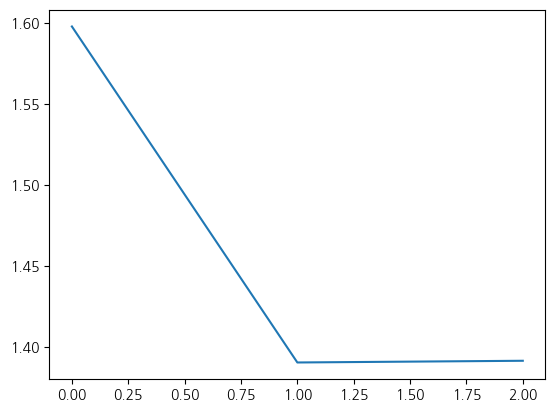

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.25      1.00      0.40         5
          지젤       0.00      0.00      0.00         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.3865 Acc: 25.0000%
Training complete in 0m 60s
Best Validation Accuracy: 25.0000


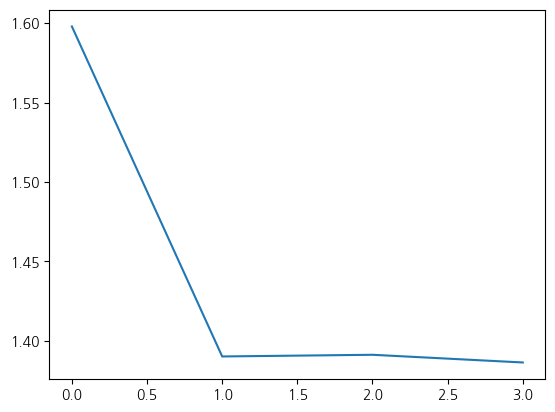

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[5 0 0 0]
 [5 0 0 0]
 [5 0 0 0]
 [5 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.25      1.00      0.40         5
          윈터       0.00      0.00      0.00         5
          지젤       0.00      0.00      0.00         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.4111 Acc: 25.0000%
Training complete in 1m 14s
Best Validation Accuracy: 25.0000


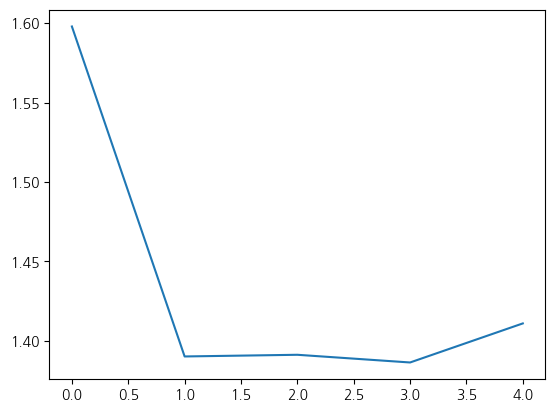

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]
 [0 0 0 5]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.00      0.00      0.00         5
         카리나       0.25      1.00      0.40         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.3884 Acc: 25.0000%
Training complete in 1m 29s
Best Validation Accuracy: 25.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


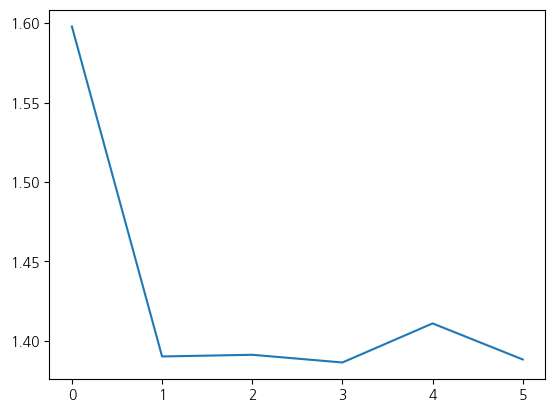

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]
 [0 5 0 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.25      1.00      0.40         5
          지젤       0.00      0.00      0.00         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.3992 Acc: 25.0000%
Training complete in 1m 45s
Best Validation Accuracy: 25.0000


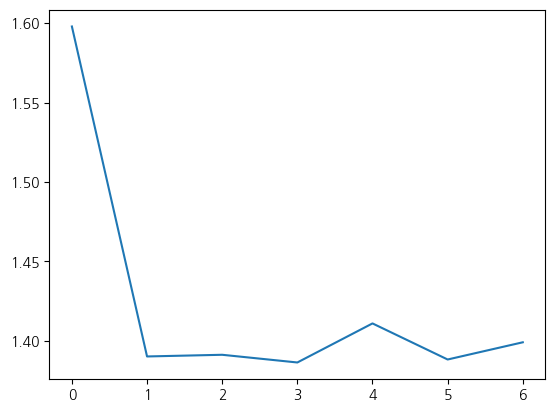

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.25      1.00      0.40         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.4173 Acc: 25.0000%
Training complete in 2m 0s
Best Validation Accuracy: 25.0000


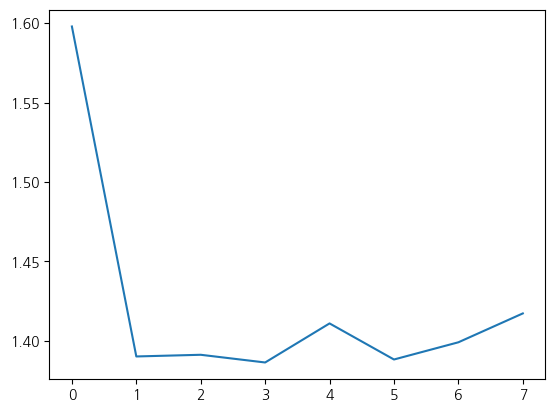

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[5 0 0 0]
 [5 0 0 0]
 [5 0 0 0]
 [5 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.25      1.00      0.40         5
          윈터       0.00      0.00      0.00         5
          지젤       0.00      0.00      0.00         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.3996 Acc: 25.0000%
Training complete in 2m 15s
Best Validation Accuracy: 25.0000


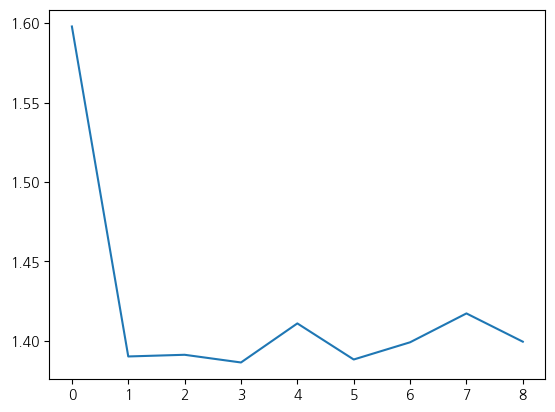

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.25      1.00      0.40         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.06      0.25      0.10        20
weighted avg       0.06      0.25      0.10        20

Validation Loss: 1.4014 Acc: 25.0000%
Training complete in 2m 31s
Best Validation Accuracy: 25.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


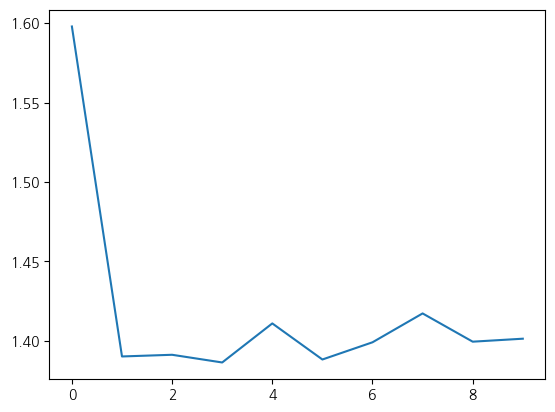

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[0 1 4 0]
 [0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.00      0.00      0.00         5
          윈터       0.00      0.00      0.00         5
          지젤       0.26      1.00      0.42         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.07      0.25      0.10        20
weighted avg       0.07      0.25      0.10        20

Validation Loss: 1.3869 Acc: 25.0000%
Training complete in 2m 45s
Best Validation Accuracy: 25.0000


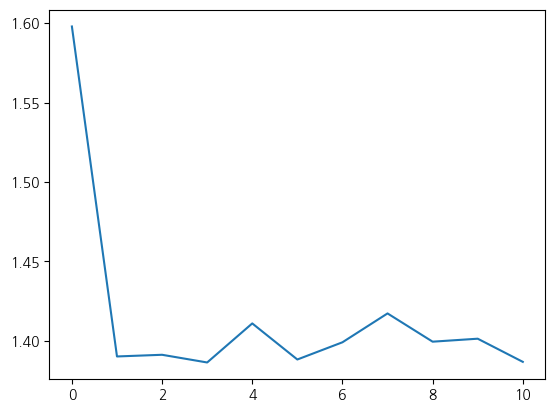

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 4 0]
 [0 1 4 0]
 [0 1 4 0]
 [0 2 3 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.20      0.33         5
          윈터       0.25      0.20      0.22         5
          지젤       0.27      0.80      0.40         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.30        20
   macro avg       0.38      0.30      0.24        20
weighted avg       0.38      0.30      0.24        20

Validation Loss: 1.3813 Acc: 30.0000%
Training complete in 3m 0s
Best Validation Accuracy: 30.0000


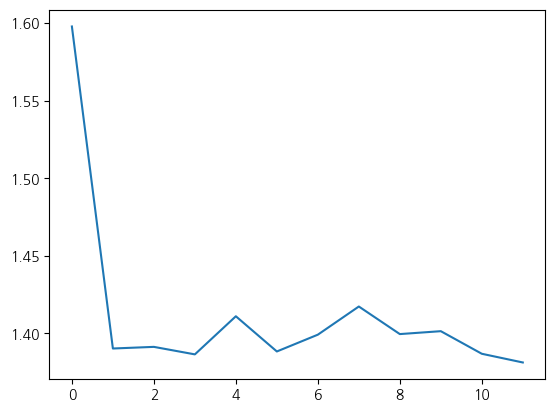

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 4 0]
 [0 0 5 0]
 [0 0 4 1]
 [0 0 4 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.20      0.33         5
          윈터       0.00      0.00      0.00         5
          지젤       0.24      0.80      0.36         5
         카리나       0.50      0.20      0.29         5

    accuracy                           0.30        20
   macro avg       0.43      0.30      0.25        20
weighted avg       0.43      0.30      0.25        20

Validation Loss: 1.3831 Acc: 30.0000%
Training complete in 3m 15s
Best Validation Accuracy: 30.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


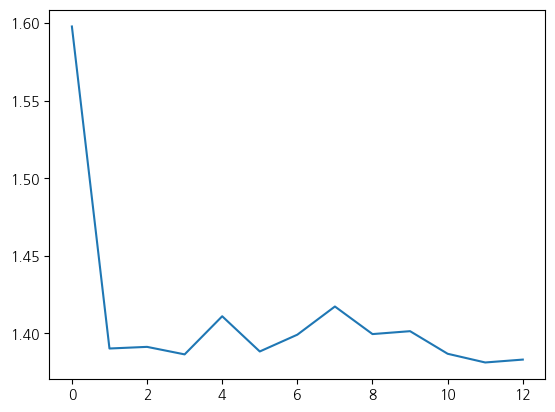

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 4 0]
 [0 0 5 0]
 [1 0 4 0]
 [1 0 4 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.24      0.80      0.36         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.14      0.25      0.15        20
weighted avg       0.14      0.25      0.15        20

Validation Loss: 1.3763 Acc: 25.0000%
Training complete in 3m 30s
Best Validation Accuracy: 30.0000


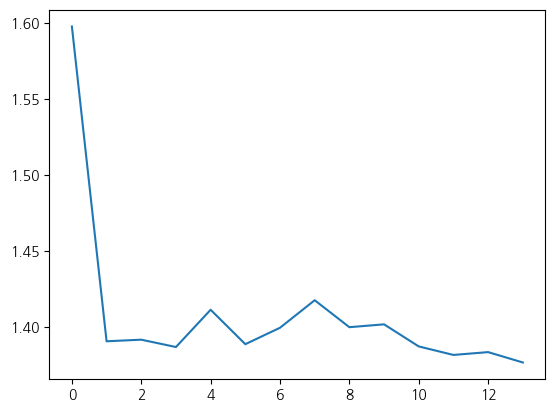

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 3m 45s
Best Validation Accuracy: 35.0000


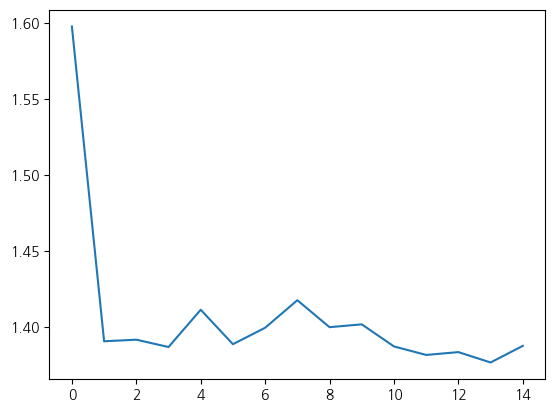

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[2 0 3 0]
 [0 0 4 1]
 [1 0 4 0]
 [2 0 3 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.40      0.40      0.40         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.30        20
   macro avg       0.17      0.30      0.21        20
weighted avg       0.17      0.30      0.21        20

Validation Loss: 1.3905 Acc: 30.0000%
Training complete in 4m 0s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


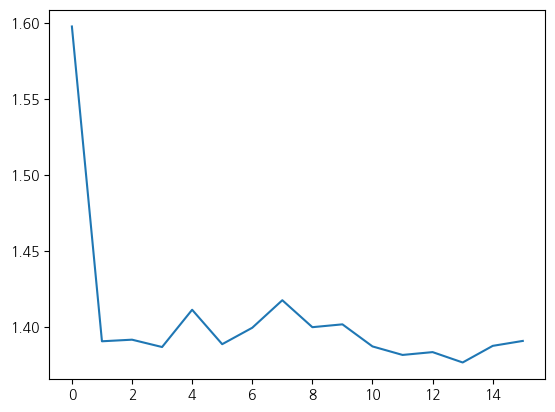

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 4 0]
 [0 0 5 0]
 [0 0 5 0]
 [1 0 4 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.50      0.20      0.29         5
          윈터       0.00      0.00      0.00         5
          지젤       0.28      1.00      0.43         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.30        20
   macro avg       0.19      0.30      0.18        20
weighted avg       0.19      0.30      0.18        20

Validation Loss: 1.3871 Acc: 30.0000%
Training complete in 4m 15s
Best Validation Accuracy: 35.0000


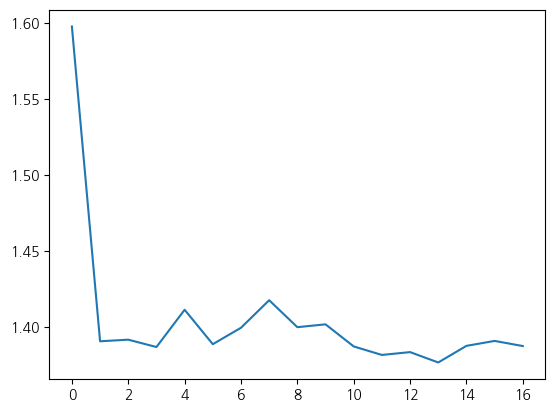

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3806 Acc: 30.0000%
Training complete in 4m 30s
Best Validation Accuracy: 35.0000


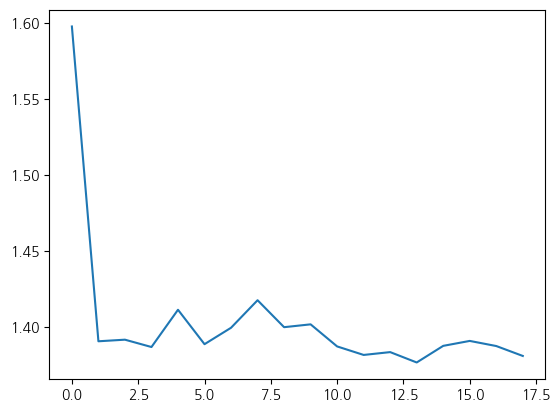

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3911 Acc: 30.0000%
Training complete in 4m 44s
Best Validation Accuracy: 35.0000


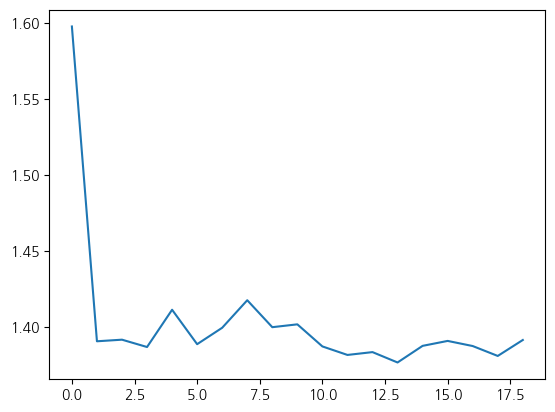

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 4 0]
 [0 0 5 0]
 [0 0 5 0]
 [0 0 5 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       1.00      0.20      0.33         5
          윈터       0.00      0.00      0.00         5
          지젤       0.26      1.00      0.42         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.30        20
   macro avg       0.32      0.30      0.19        20
weighted avg       0.32      0.30      0.19        20

Validation Loss: 1.3828 Acc: 30.0000%
Training complete in 4m 59s
Best Validation Accuracy: 35.0000


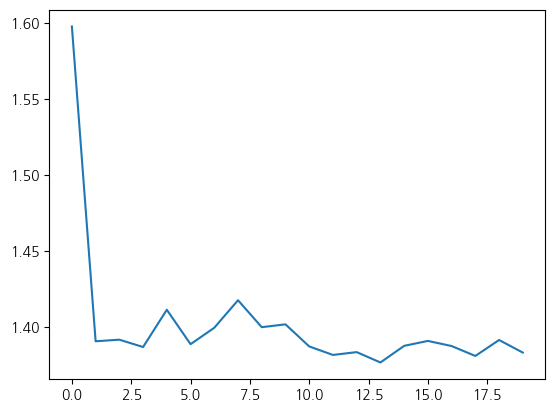

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3863 Acc: 30.0000%
Training complete in 5m 13s
Best Validation Accuracy: 35.0000


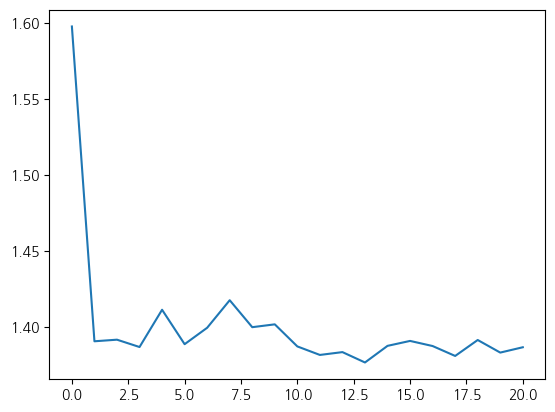

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 4 0]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 4 0]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.25      0.80      0.38         5
         카리나       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.15      0.25      0.16        20
weighted avg       0.15      0.25      0.16        20

Validation Loss: 1.3858 Acc: 25.0000%
Training complete in 5m 28s
Best Validation Accuracy: 35.0000


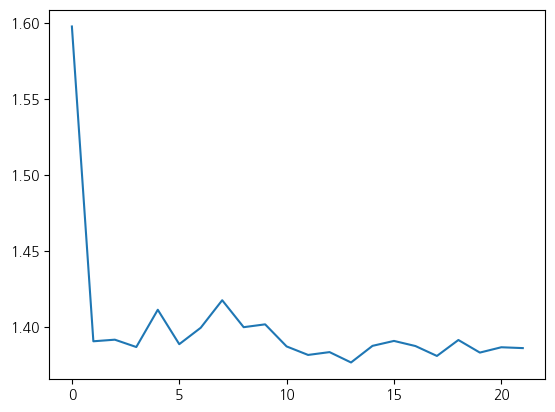

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3875 Acc: 30.0000%
Training complete in 5m 43s
Best Validation Accuracy: 35.0000


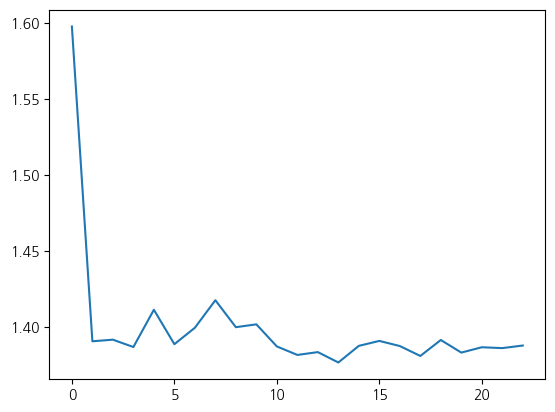

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3923 Acc: 30.0000%
Training complete in 5m 57s
Best Validation Accuracy: 35.0000


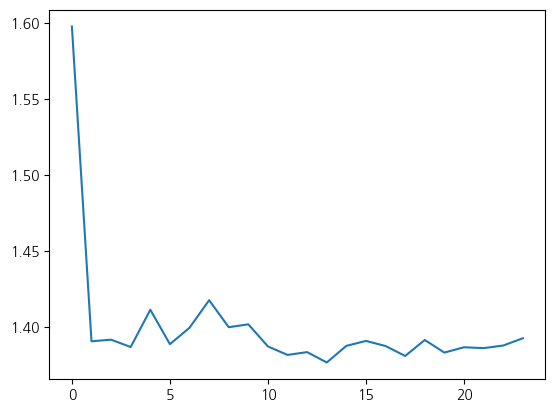

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3879 Acc: 30.0000%
Training complete in 6m 11s
Best Validation Accuracy: 35.0000


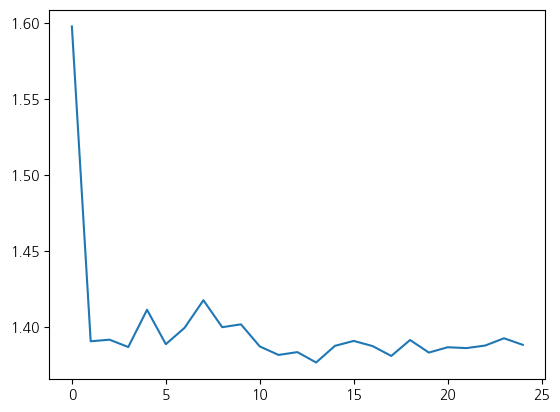

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3867 Acc: 30.0000%
Training complete in 6m 25s
Best Validation Accuracy: 35.0000


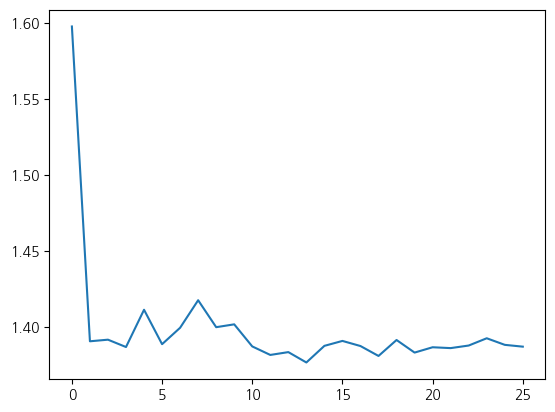

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3864 Acc: 30.0000%
Training complete in 6m 40s
Best Validation Accuracy: 35.0000


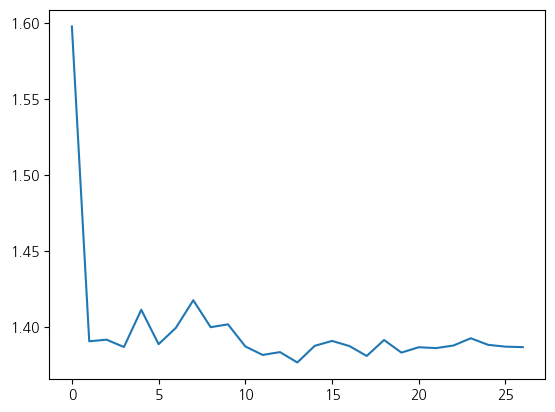

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3906 Acc: 30.0000%
Training complete in 6m 54s
Best Validation Accuracy: 35.0000


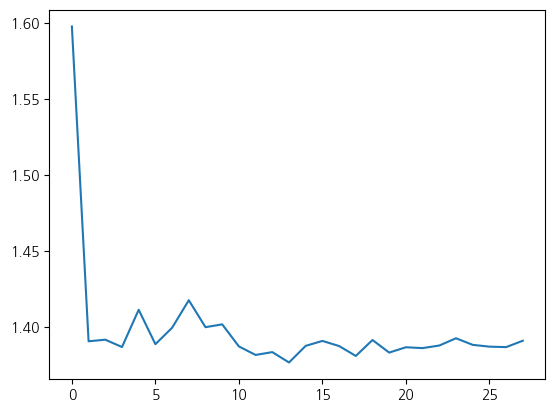

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3872 Acc: 30.0000%
Training complete in 7m 9s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


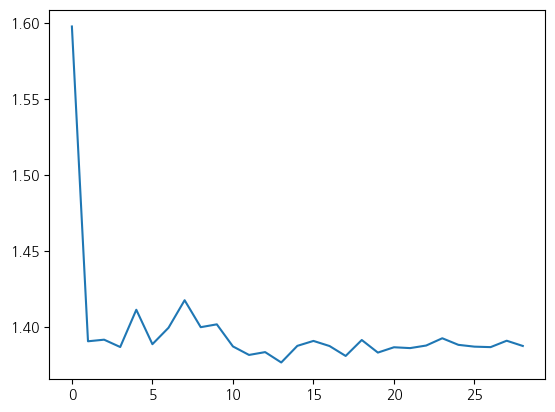

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3873 Acc: 30.0000%
Training complete in 7m 24s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


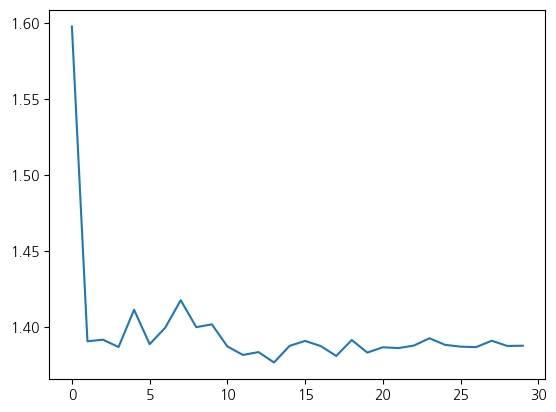

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3871 Acc: 30.0000%
Training complete in 7m 39s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


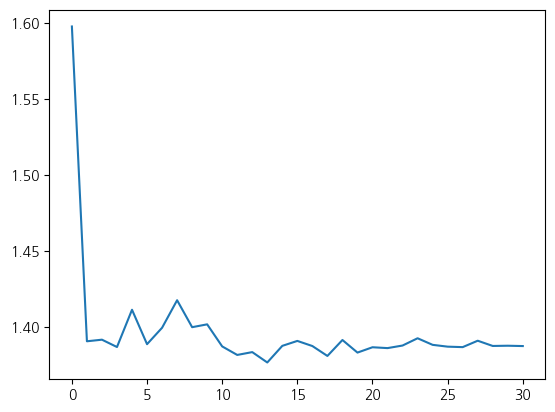

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3875 Acc: 30.0000%
Training complete in 7m 54s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


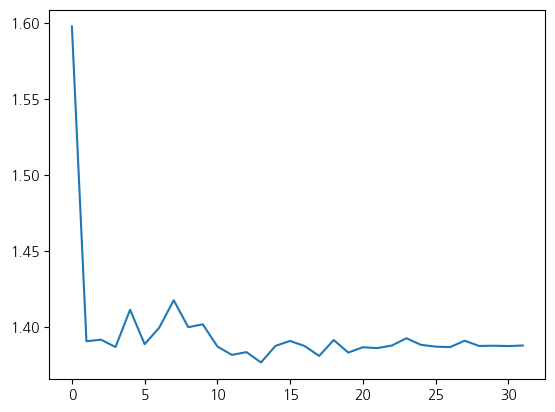

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3875 Acc: 35.0000%
Training complete in 8m 9s
Best Validation Accuracy: 35.0000


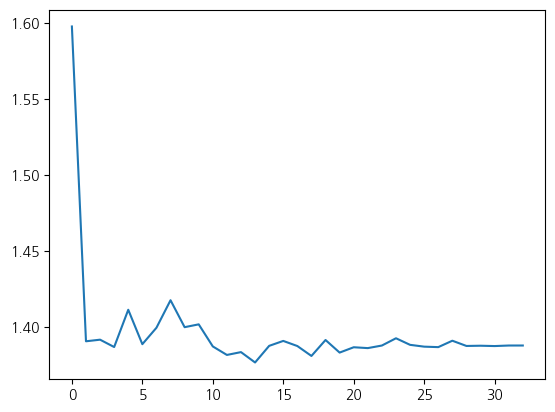

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3878 Acc: 35.0000%
Training complete in 8m 24s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


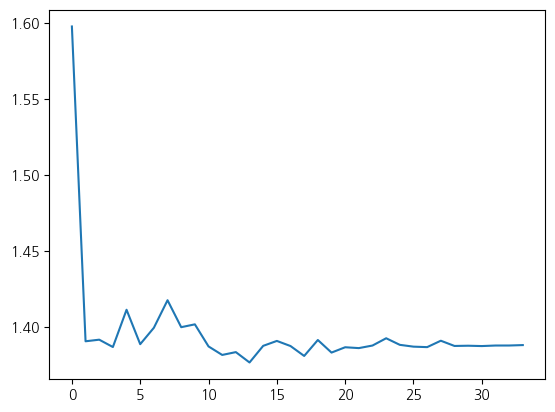

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3872 Acc: 30.0000%
Training complete in 8m 39s
Best Validation Accuracy: 35.0000


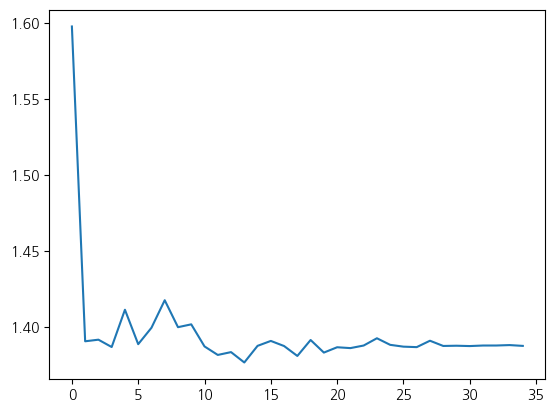

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3875 Acc: 30.0000%
Training complete in 8m 54s
Best Validation Accuracy: 35.0000


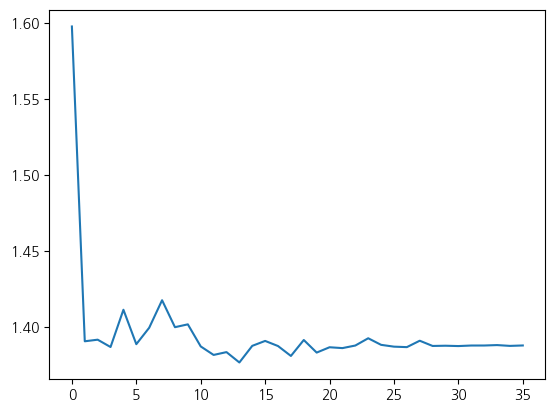

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3874 Acc: 30.0000%
Training complete in 9m 10s
Best Validation Accuracy: 35.0000


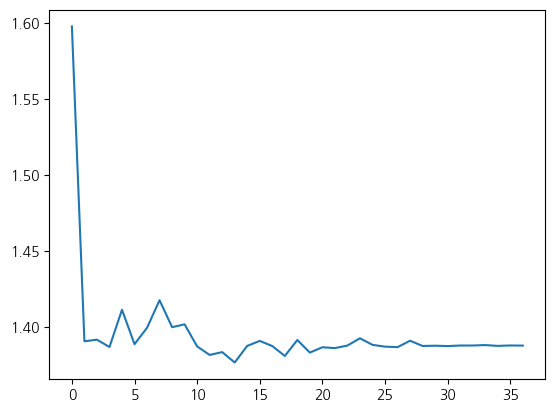

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3875 Acc: 30.0000%
Training complete in 9m 25s
Best Validation Accuracy: 35.0000


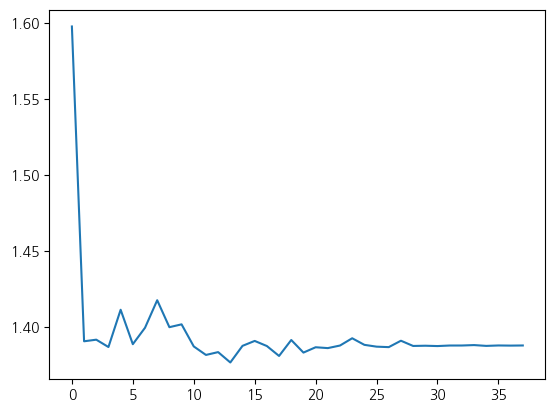

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 3 1]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.29      0.80      0.42         5
         카리나       0.33      0.20      0.25         5

    accuracy                           0.30        20
   macro avg       0.24      0.30      0.23        20
weighted avg       0.24      0.30      0.23        20

Validation Loss: 1.3873 Acc: 30.0000%
Training complete in 9m 40s
Best Validation Accuracy: 35.0000


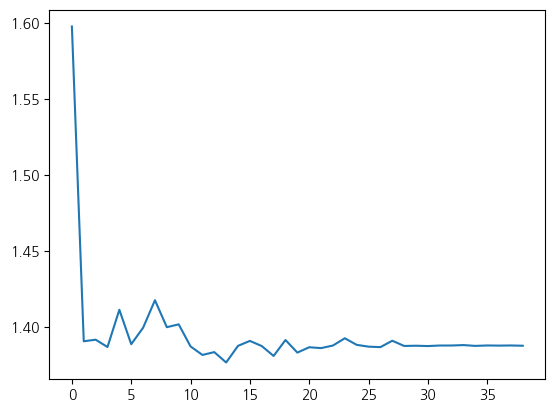

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3877 Acc: 35.0000%
Training complete in 9m 55s
Best Validation Accuracy: 35.0000


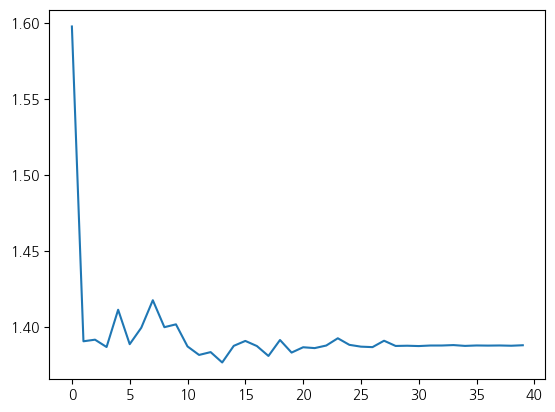

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 10m 10s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


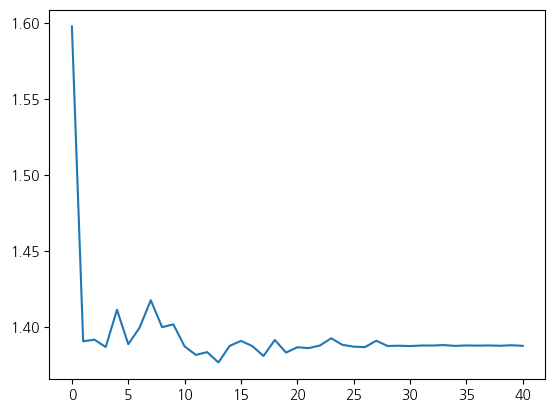

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3872 Acc: 35.0000%
Training complete in 10m 25s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


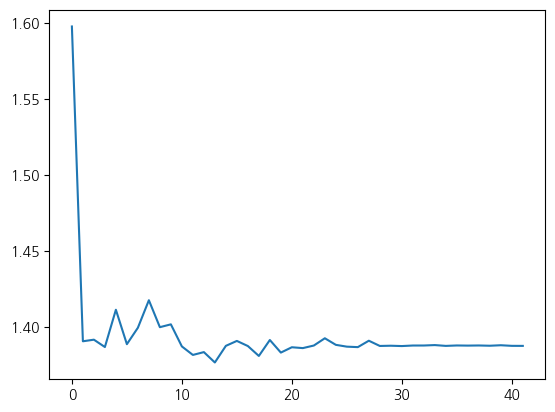

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3872 Acc: 35.0000%
Training complete in 10m 39s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


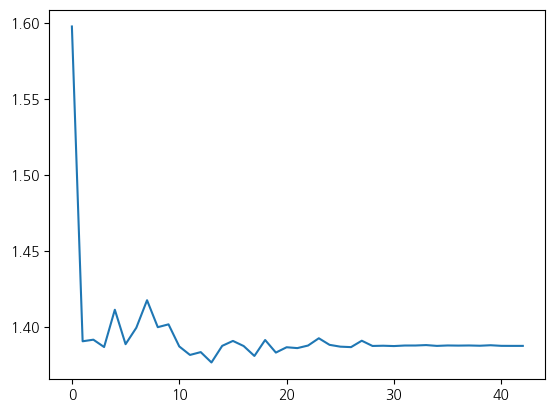

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 10m 54s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


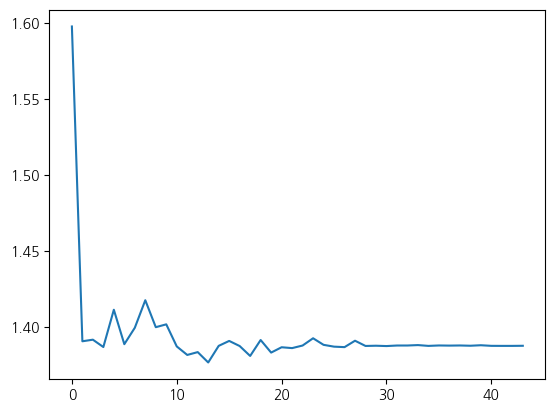

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 11m 9s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


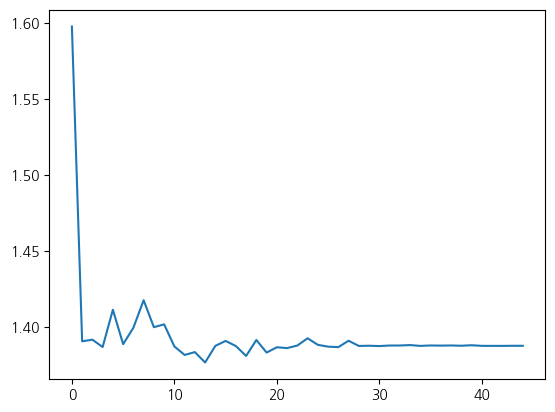

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3872 Acc: 35.0000%
Training complete in 11m 23s
Best Validation Accuracy: 35.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


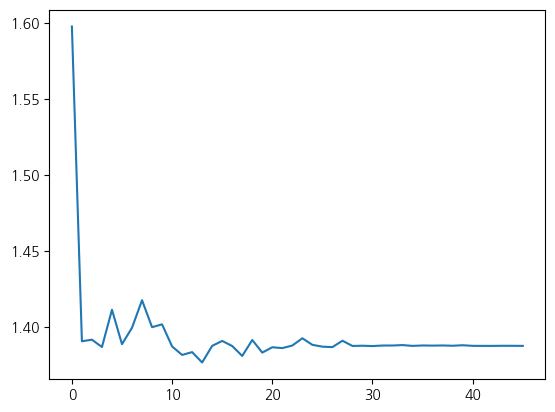

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 11m 38s
Best Validation Accuracy: 35.0000


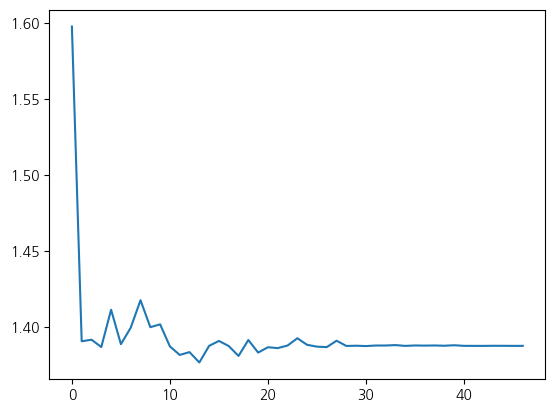

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 11m 52s
Best Validation Accuracy: 35.0000


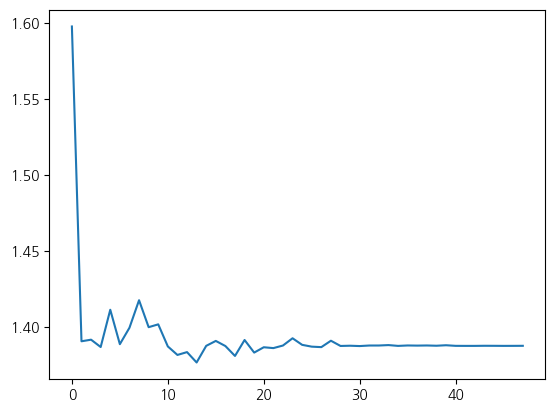

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 12m 6s
Best Validation Accuracy: 35.0000


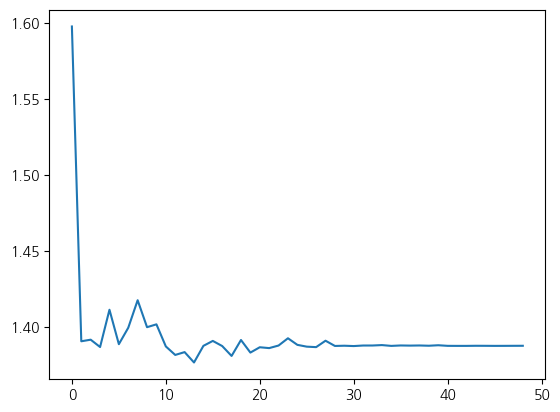

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

Confusion Matrix:
[[1 0 3 1]
 [0 0 4 1]
 [1 0 4 0]
 [1 0 2 2]]
Classification Report:
              precision    recall  f1-score   support

          닝닝       0.33      0.20      0.25         5
          윈터       0.00      0.00      0.00         5
          지젤       0.31      0.80      0.44         5
         카리나       0.50      0.40      0.44         5

    accuracy                           0.35        20
   macro avg       0.29      0.35      0.28        20
weighted avg       0.29      0.35      0.28        20

Validation Loss: 1.3873 Acc: 35.0000%
Training complete in 12m 20s
Best Validation Accuracy: 35.0000


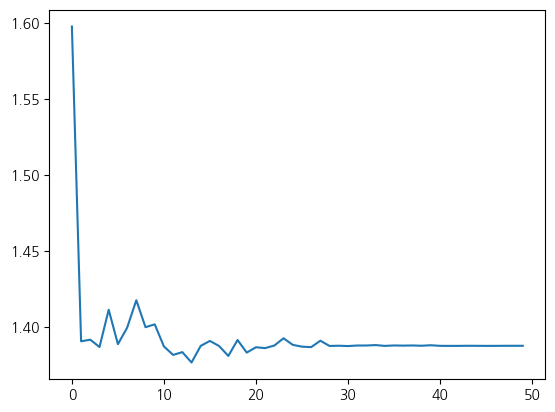

In [19]:
import copy
import time
num_epochs = 50
model.train()
start_time = time.time()
best_acc = -1
losslist = []
acclist = []

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)


    # 학습률 스케줄러 업데이트
    scheduler.step()

    # 학습 과정 중에 결과 출력


    # validation을 위한 함수 호출
    val_loss, val_acc = evaluate(model, criterion, val_dataloader, device)
    losslist.append(val_loss)
    acclist.append(val_acc)
    
    # validation 결과 출력
    print('Validation Loss: {:.4f} Acc: {:.4f}%'.format(val_loss, val_acc))

    # Best Model 저장
    if val_acc > best_acc:
        best_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
    end = time.time()
    time_elapsed= end - start_time
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Validation Accuracy: {:.4f}'.format(best_acc))

    # Best Model 불러오기
    model.load_state_dict(best_model_wts)
    if epoch < 2:
      continue
    plt.plot(losslist)
    plt.show()

25.0


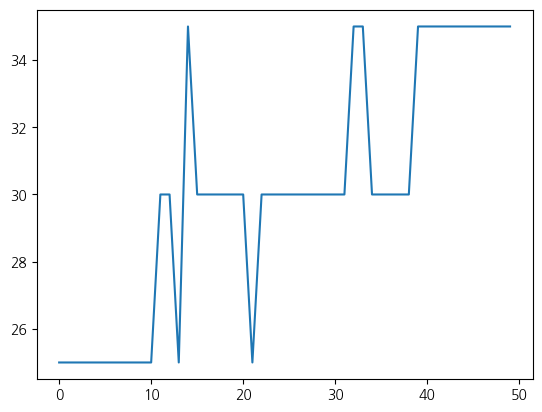

In [20]:
print(acclist[0].item())
result = []
for x in acclist:
  result.append(x.item())
plt.plot(result)
plt.show()

학습한 모델 평가

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[예측 결과: 닝닝] (실제 정답: 닝닝)


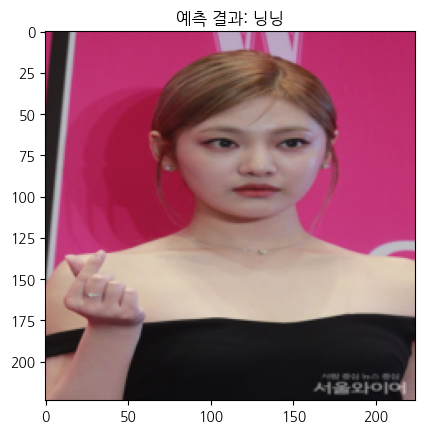

[예측 결과: 카리나] (실제 정답: 지젤)


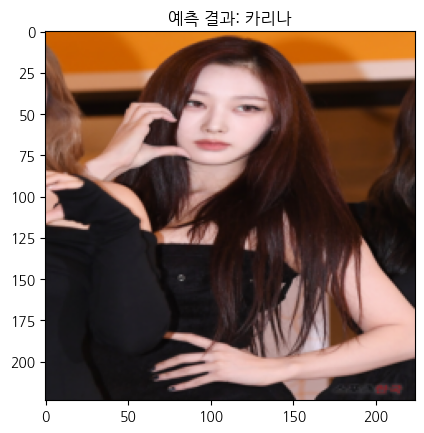

[예측 결과: 지젤] (실제 정답: 닝닝)


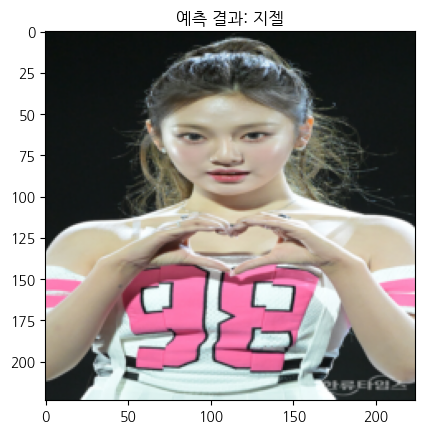

[예측 결과: 지젤] (실제 정답: 카리나)


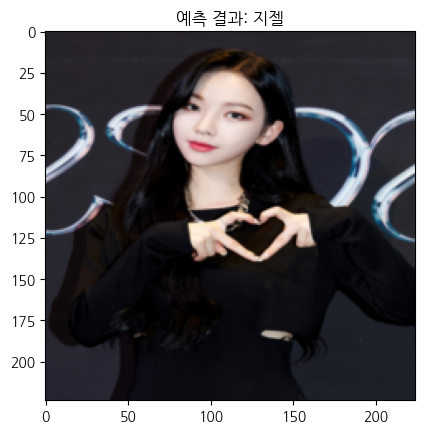

[예측 결과: 지젤] (실제 정답: 카리나)


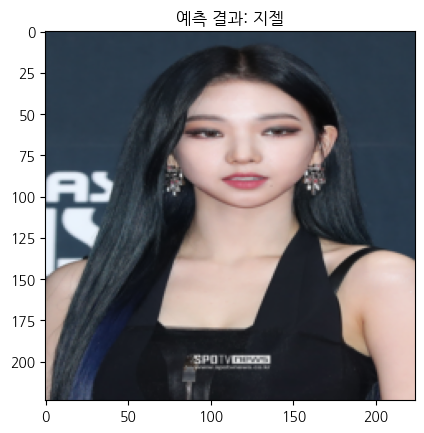

[Test Phase] Loss: 1.2975 Acc: 30.0000% Time: 3.3076s
(20, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


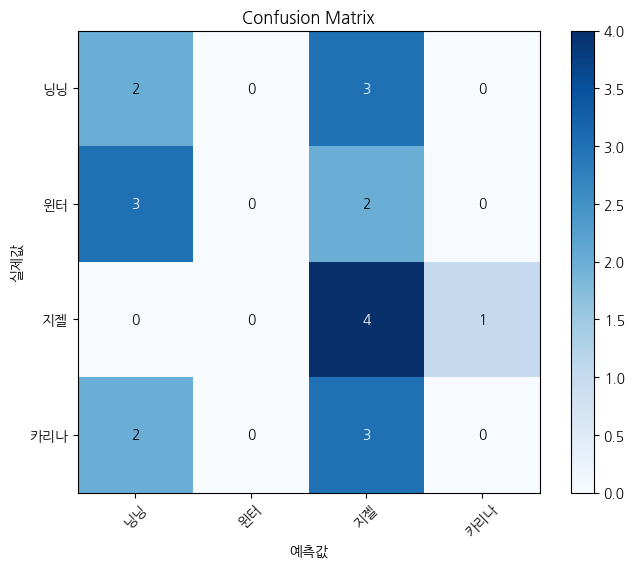

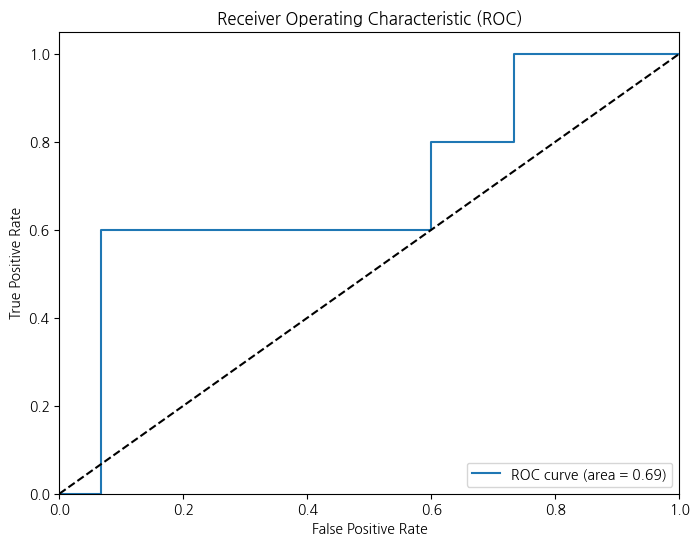

F1 스코어: 0.2010
Precision: 0.1548
Recall: 0.3000
Accuracy: 0.3000


In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score

# ...

# 모델 평가
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0
    all_preds = []  # 예측 값들을 저장할 리스트
    all_labels = []  # 실제 레이블들을 저장할 리스트
    probs = []  # 확률값을 저장할 리스트

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())  # 예측 값들을 리스트에 추가
        all_labels.extend(labels.data.cpu().numpy())  # 실제 레이블들을 리스트에 추가

        probs.extend(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())  # 확률값들을 리스트에 추가

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

    # `probs`와 `all_labels`의 길이를 확인하고 조정
    if len(probs) != len(all_labels):
        print("Error: Number of samples in `probs` and `all_labels` do not match.")
        exit()

    # `probs`의 shape 확인
    probs = np.array(probs)
    print(probs.shape)

# Confusion Matrix 계산
confusion = confusion_matrix(all_labels, all_preds)

# Precision 계산
precision = precision_score(all_labels, all_preds, average='macro')

# Recall 계산
recall = recall_score(all_labels, all_preds, average='macro')

# Accuracy 계산
accuracy = accuracy_score(all_labels, all_preds)

# Confusion Matrix 출력
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('예측값')
plt.ylabel('실제값')
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white' if confusion[i, j] > np.max(confusion) / 2 else 'black')
plt.show()

# ROC Curve 계산 및 그리기
fpr, tpr, thresholds = roc_curve(all_labels, probs[:, 1], pos_label=1)  # ROC Curve 계산
roc_auc = auc(fpr, tpr)  # AUC 계산

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# F1 Score 계산
f1 = f1_score(all_labels, all_preds, average='macro')

print('F1 스코어: {:.4f}'.format(f1))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('Accuracy: {:.4f}'.format(accuracy))
